In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
#data_url = "https://raw.githubusercontent.com/dthonon/pna_loup_suivi/main/data/"
data_url = "/home/dthonon/Code/pna_loup_suivi/data/"
# Lecture des départements
dept = pd.read_csv(
    data_url + "departements-region.csv",
    sep=";",
    header=0,
    names=[
        "Num_Département",
        "Département",
        "Région",
    ],
)
# Lecture des dommages aux animaux de rente
dommages = pd.read_csv(data_url + "dommages.csv", sep=";")
# Lecture des tirs létaux sur les loups
interventions = pd.read_csv(data_url + "protocole_intervention.csv", sep=";")
interventions = interventions.fillna(0)  # Remplace les valeurs manquantes par 0
# Regroupement dans 1 dataframe
donnees_pna = pd.merge(dommages, interventions)

# Ajout des départements et régions
# dommages = pd.merge(dommages, dept, on="Département")
# interventions = pd.merge(interventions, dept, on="Département")
donnees_pna = pd.merge(donnees_pna, dept, on="Département")

# # Suppression des lignes sans dommages
# donnees_pna.fillna(0, inplace=True)
# donnees_pna.drop(donnees_pna[donnees_pna.Nb_dossiers == 0].index, inplace = True)

# Calcul des colonnes supplémentaires
donnees_pna["AP_TOTAL"] = donnees_pna.apply(
    lambda row: row.AP_TDS + row.AP_TDR + row.AP_TP + row.AP_TPR, axis=1
)
donnees_pna["Loups_tués"] = donnees_pna.apply(
    lambda row: row.Loups_tués_légal + row.Loups_tués_illégal, axis=1
)
donnees_pna["Ratio_loups_tués_dommages"] = donnees_pna["Loups_tués"]/donnees_pna["Nb_animaux_tués"]
donnees_pna

,Année,Département,Nb_dossiers,Nb_animaux_tués,Nb_dossiers_N1,Nb_animaux_tués_N1,Nb_dossiers_N2,Nb_animaux_tués_N2,AP_TDS,AP_TDR,AP_TP,AP_TPR,Loups_tués_légal,Loups_tués_illégal,Loups_tués_accident,Num_Département,Région,AP_TOTAL,Loups_tués,Ratio_loups_tués_dommages
0,2016,Alpes-de-Haute-Provence,477.0,1272.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,4.0,0.0,2.0,4,Provence-Alpes-Côte d'Azur,0.0,4.0,0.003145
1,2016,Alpes-Maritimes,851.0,3115.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,12.0,0.0,0.0,6,Provence-Alpes-Côte d'Azur,0.0,12.0,0.003852
2,2016,Drôme,127.0,407.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0,0.0,1.0,26,Auvergne-Rhône-Alpes,0.0,3.0,0.007371
3,2016,Hautes-Alpes,219.0,771.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5,Provence-Alpes-Côte d'Azur,0.0,1.0,0.001297
4,2016,Isère,198.0,710.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,38,Auvergne-Rhône-Alpes,0.0,3.0,0.004225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2025,Vaucluse,NaN,NaN,NaN,NaN,NaN,NaN,23.0,0.0,0.0,0.0,0.0,0.0,0.0,84,Provence-Alpes-Côte d'Azur,23.0,0.0,NaN
323,2025,Vienne,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86,Nouvelle-Aquitaine,0.0,0.0,NaN
324,2025,Vosges,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,88,Grand Est,1.0,0.0,NaN
325,2025,Yonne,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89,Bourgogne-Franche-Comté,0.0,0.0,NaN


In [44]:
interventions_dept = pd.merge(interventions, dept, on="Département")
interventions_y = interventions_dept.groupby(["Année"])
print(interventions_y.sum(numeric_only=True))

       AP_TDS  AP_TDR  AP_TP  AP_TPR  Loups_tués_légal  Loups_tués_illégal  \
Année                                                                        
2012      0.0     0.0    0.0     0.0               3.0                 0.0   
2013      0.0     0.0    0.0     0.0               4.0                 0.0   
2014      0.0     0.0    0.0     0.0               8.0                 0.0   
2015      0.0     0.0    0.0     0.0              19.0                 0.0   
2016      0.0     0.0    0.0     0.0              33.0                 0.0   
2017      0.0     0.0    0.0     0.0              34.0                 1.0   
2018   1469.0   161.0    5.0    15.0              47.0                 4.0   
2019   1609.0   210.0   12.0     2.0              94.0                 5.0   
2020   2084.0   319.0    7.0     2.0              97.0                 8.0   
2021   2188.0   231.0    0.0     0.0             100.0                 6.0   
2022   2436.0   335.0    0.0     0.0             162.0          

In [45]:
dommages_dept = pd.merge(dommages, dept, on="Département")
dommages_y = dommages_dept.groupby(["Année"])
dommages_y.sum(numeric_only=True)

,Nb_dossiers,Nb_animaux_tués,Nb_dossiers_N1,Nb_animaux_tués_N1,Nb_dossiers_N2,Nb_animaux_tués_N2
Année,,,,,,
2016,2756.0,9932.0,0.0,0.0,0.0,0.0
2017,3228.0,11993.0,0.0,0.0,0.0,0.0
2018,3088.0,10672.0,0.0,0.0,0.0,0.0
2019,3651.0,12094.0,0.0,0.0,0.0,0.0
2020,3670.0,11746.0,0.0,0.0,0.0,0.0
2021,3537.0,10826.0,0.0,0.0,0.0,0.0
2022,3690.0,11527.0,0.0,0.0,0.0,0.0
2023,4091.0,10877.0,0.0,0.0,0.0,0.0
2024,4177.0,11224.0,0.0,0.0,0.0,0.0


In [46]:
donnees_pna_yg = donnees_pna.groupby(["Année"])
donnees_pna_y = donnees_pna_yg.sum(numeric_only=True)
donnees_pna_y["Ratio_loups_tués_dommages"] = donnees_pna_y["Loups_tués"]/donnees_pna_y["Nb_animaux_tués"]
donnees_pna_y

,Nb_dossiers,Nb_animaux_tués,Nb_dossiers_N1,Nb_animaux_tués_N1,Nb_dossiers_N2,Nb_animaux_tués_N2,AP_TDS,AP_TDR,AP_TP,AP_TPR,Loups_tués_légal,Loups_tués_illégal,Loups_tués_accident,AP_TOTAL,Loups_tués,Ratio_loups_tués_dommages
Année,,,,,,,,,,,,,,,,
2016,2465.0,9040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,5.0,0.0,33.0,0.003650
2017,2551.0,9586.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,1.0,1.0,0.0,35.0,0.003651
2018,3061.0,10589.0,0.0,0.0,0.0,0.0,1469.0,161.0,5.0,15.0,47.0,4.0,27.0,1650.0,51.0,0.004816
2019,3559.0,11793.0,0.0,0.0,0.0,0.0,1609.0,210.0,12.0,2.0,94.0,5.0,20.0,1833.0,99.0,0.008395
2020,3517.0,11364.0,0.0,0.0,0.0,0.0,2084.0,319.0,7.0,2.0,97.0,8.0,0.0,2412.0,105.0,0.009240
2021,3409.0,10462.0,0.0,0.0,0.0,0.0,2188.0,231.0,0.0,0.0,100.0,6.0,0.0,2419.0,106.0,0.010132
2022,3644.0,11435.0,0.0,0.0,0.0,0.0,2436.0,335.0,0.0,0.0,162.0,6.0,0.0,2771.0,168.0,0.014692
2023,4078.0,10839.0,0.0,0.0,0.0,0.0,1380.0,65.0,0.0,0.0,198.0,9.0,0.0,1445.0,207.0,0.019098
2024,4124.0,11041.0,0.0,0.0,0.0,0.0,2655.0,135.0,0.0,0.0,195.0,9.0,0.0,2790.0,204.0,0.018477


In [33]:
# Apply the default theme
sns.set_theme()

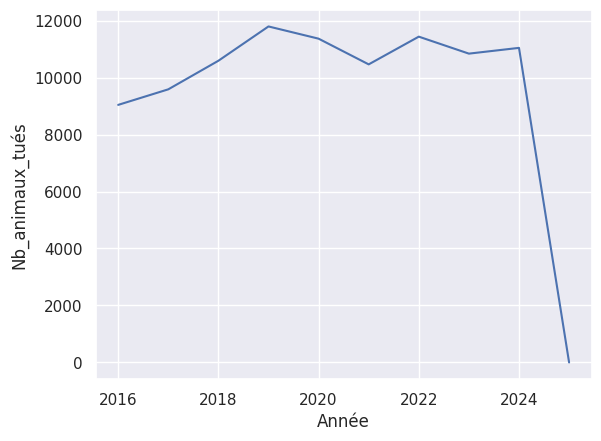

In [47]:
sns.lineplot(data=donnees_pna_y, x="Année", y="Nb_animaux_tués");

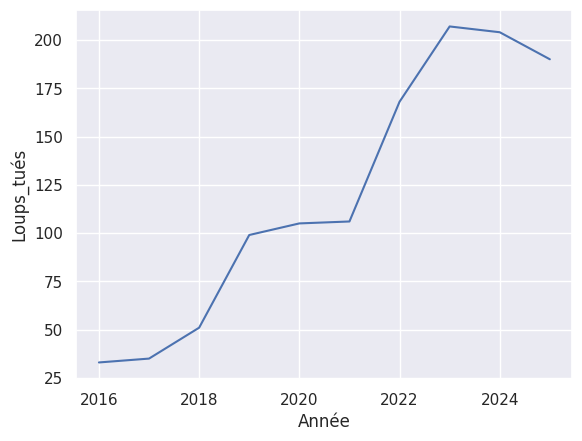

In [48]:
sns.lineplot(data=donnees_pna_y, x="Année", y="Loups_tués");

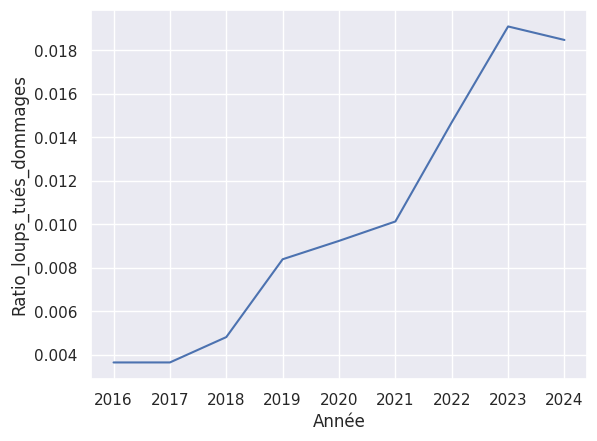

In [49]:
sns.lineplot(data=donnees_pna_y, x="Année", y="Ratio_loups_tués_dommages");

In [54]:
dept_max = (
    "Num_Département == '6' or Num_Département == '4' or Num_Département == '5' or Num_Département == '83'"
    + "or Num_Département == '26' or Num_Département == '38' or Num_Département == '73' or Num_Département == '74'"
)
donnees_pna_max = donnees_pna.query(dept_max)


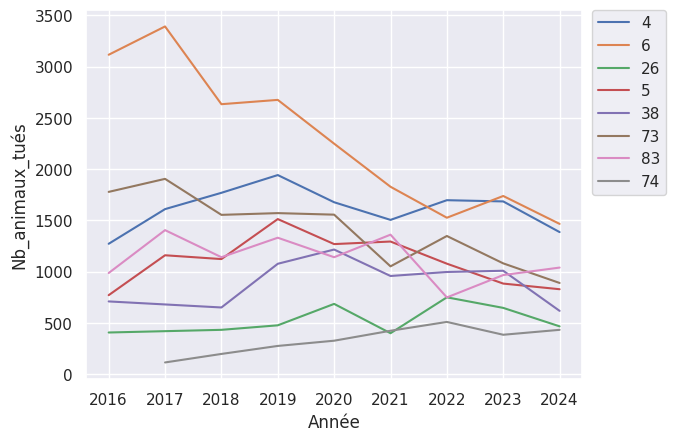

In [56]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Nb_animaux_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

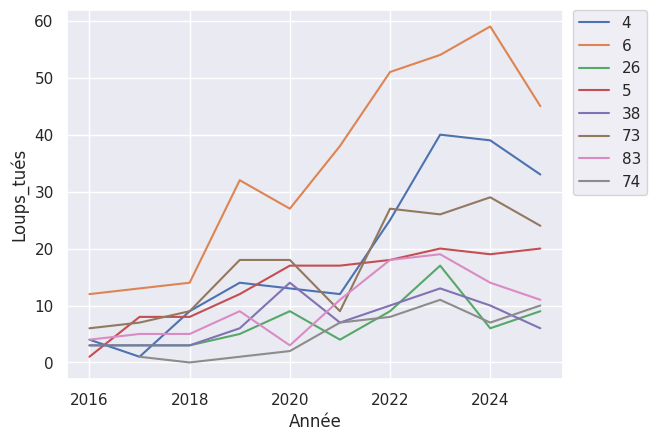

In [57]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Loups_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

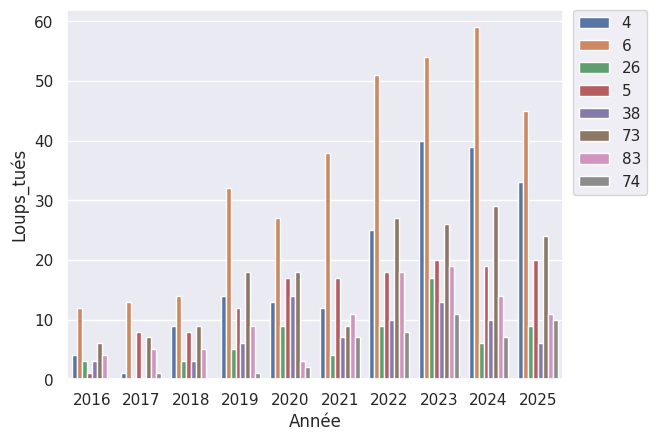

In [58]:
sns.barplot(data=donnees_pna_max, x="Année", y="Loups_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

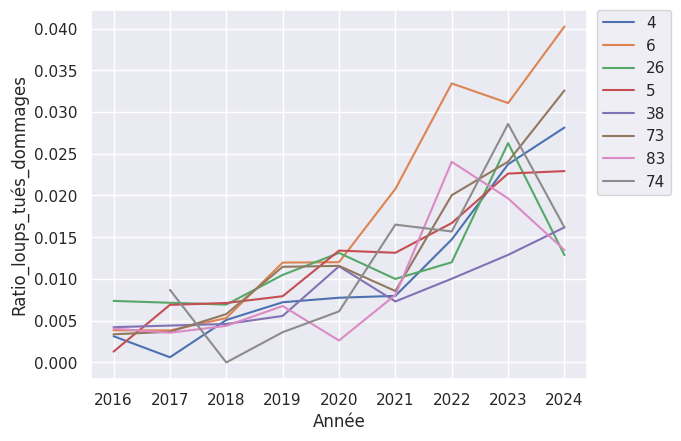

In [59]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Ratio_loups_tués_dommages", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

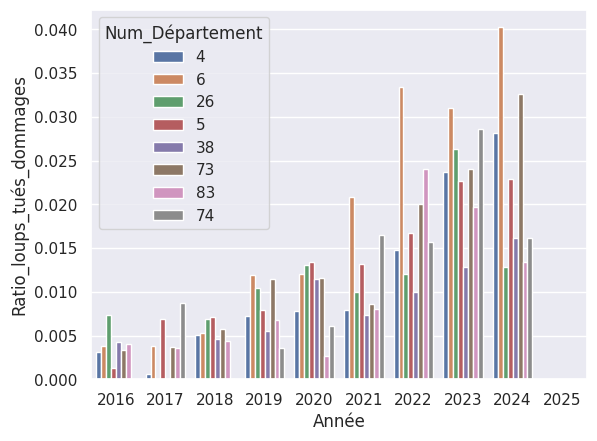

In [60]:
sns.barplot(data=donnees_pna_max, x="Année", y="Ratio_loups_tués_dommages", hue="Num_Département");

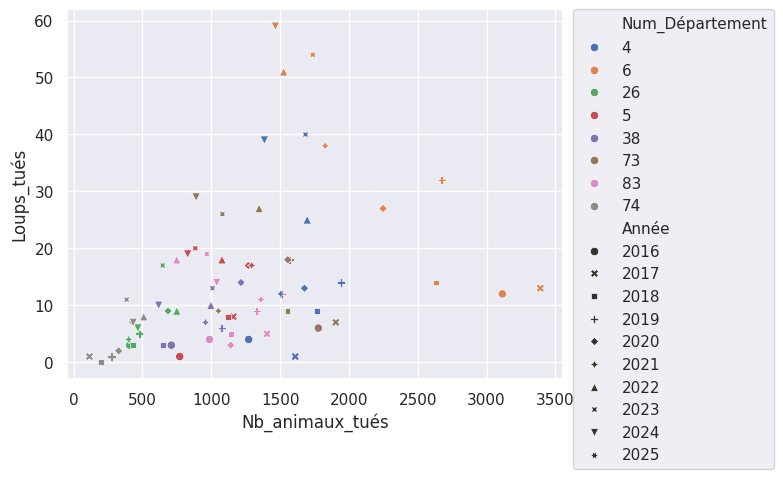

In [61]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="Loups_tués",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

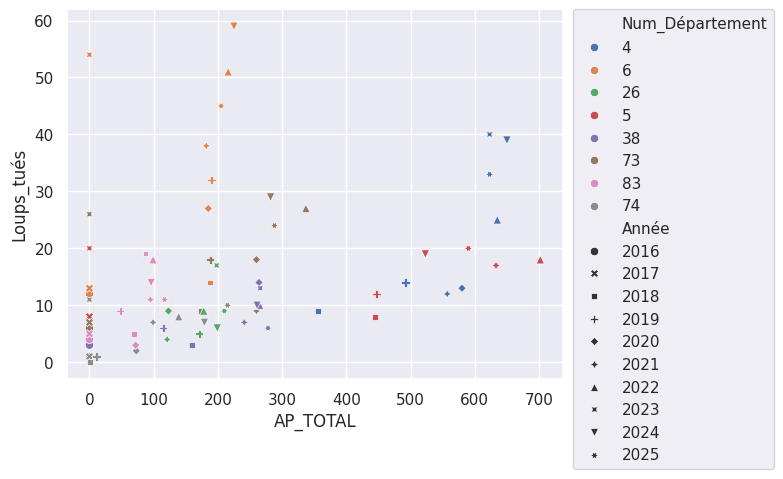

In [62]:
sns.scatterplot(
    data=donnees_pna_max,
    x="AP_TOTAL",
    y="Loups_tués",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

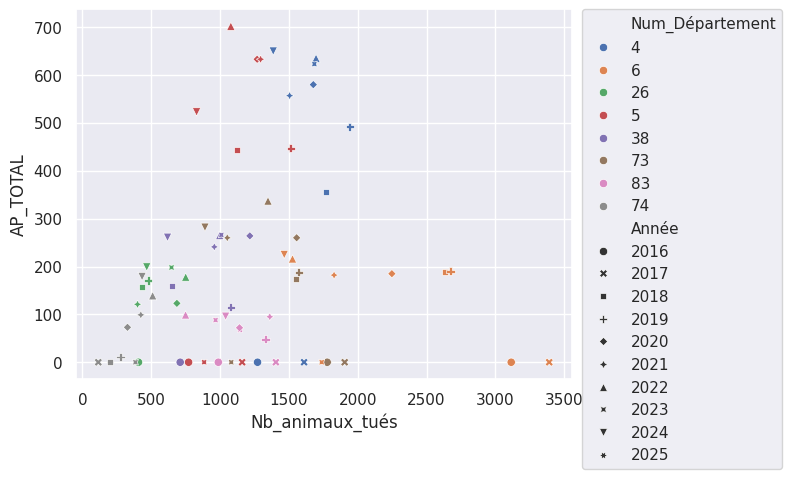

In [63]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="AP_TOTAL",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);